<a href="https://colab.research.google.com/github/generacionmovil/ocupacion/blob/main/Codigo_Ciclo_For_para_todas_las_celdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paquetes

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 9.5MB 22.4MB/s 
     |████████████████████████████████| 2.1MB 37.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
import logging
import numpy as np

In [ ]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For Arima
import pmdarima
import statsmodels.tsa.api as smt
## For Lstm
from tensorflow.keras import models, layers, preprocessing as kprocessing
## For Prophet
from fbprophet import Prophet

#Tratamiento base de datos





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dtf = pd.read_csv("/content/drive/My Drive/colab bases/Consolidado General 11_2018-06_2020.csv", encoding='latin1', delimiter=';')
dtf.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.



,Id Registro,Operador ingreso,Operador salida,Codigo Zona,Placa,Tipo vehículo,Fecha ingreso,Hora ingreso,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Total minutos,Valor,Num. Factura,Tarifa,Estado factura
0,5810628,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,EHL999,Automoviles,2018-11-01 07:01:53,07:01:53,2018-11-01 07:14:47,07:14:47,NaN,NaN,0h 12m 54s,800,NaN,CARRO ZER CALDAS,Tiquete pago
1,5810635,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,FCY730,Automoviles,2018-11-01 07:02:23,07:02:23,2018-11-01 18:25:24,18:25:24,NaN,NaN,11h 23m 1s,36800,NaN,CARRO ZER CALDAS,Tiquete pago
2,5822823,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,HNV201,Automoviles,2018-11-01 07:35:28,07:35:28,2018-11-01 18:49:40,18:49:40,NaN,NaN,11h 14m 12s,36000,NaN,CARRO ZER CALDAS,Tiquete pago
3,5811677,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WUX03C,Motos,2018-11-01 07:46:34,07:46:34,2018-11-01 12:12:11,12:12:11,NaN,NaN,4h 25m 37s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
4,5811679,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,ZHA49A,Motos,2018-11-01 07:48:15,07:48:15,2018-11-01 20:58:34,20:58:34,NaN,NaN,13h 10m 19s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago


In [ ]:
print(list(dtf.columns))

['Id Registro', 'Operador ingreso', 'Operador salida', 'Codigo Zona', 'Placa', 'Tipo vehículo', 'Fecha ingreso', 'Hora ingreso', 'Fecha salida', 'Hora salida', 'Impulsador TR', 'Fecha TR', 'Total minutos', 'Valor', 'Num. Factura', 'Tarifa', 'Estado factura']


In [ ]:
##Escoger zona a filtrar
dtf=dtf[dtf['Codigo Zona']=='FULLHOGAR']
dtf.head()

,Id Registro,Operador ingreso,Operador salida,Codigo Zona,Placa,Tipo vehículo,Fecha ingreso,Hora ingreso,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Total minutos,Valor,Num. Factura,Tarifa,Estado factura
3,5811677,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WUX03C,Motos,2018-11-01 07:46:34,07:46:34,2018-11-01 12:12:11,12:12:11,NaN,NaN,4h 25m 37s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
4,5811679,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,ZHA49A,Motos,2018-11-01 07:48:15,07:48:15,2018-11-01 20:58:34,20:58:34,NaN,NaN,13h 10m 19s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
5,5811680,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,HBG80D,Motos,2018-11-01 07:51:18,07:51:18,2018-11-01 20:58:09,20:58:09,NaN,NaN,13h 6m 51s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
6,5811678,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,MBG26C,Motos,2018-11-01 07:51:58,07:51:58,2018-11-01 12:17:22,12:17:22,NaN,NaN,4h 25m 24s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
7,5811681,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,PIX35E,Motos,2018-11-01 07:52:37,07:52:37,2018-11-01 20:58:23,20:58:23,NaN,NaN,13h 5m 46s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago


In [ ]:
##Escoger tipo de vehiculo
dtf=dtf[dtf['Tipo vehículo']=='Motos']
dtf.head()

,Id Registro,Operador ingreso,Operador salida,Codigo Zona,Placa,Tipo vehículo,Fecha ingreso,Hora ingreso,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Total minutos,Valor,Num. Factura,Tarifa,Estado factura
3,5811677,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WUX03C,Motos,2018-11-01 07:46:34,07:46:34,2018-11-01 12:12:11,12:12:11,NaN,NaN,4h 25m 37s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
4,5811679,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,ZHA49A,Motos,2018-11-01 07:48:15,07:48:15,2018-11-01 20:58:34,20:58:34,NaN,NaN,13h 10m 19s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
5,5811680,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,HBG80D,Motos,2018-11-01 07:51:18,07:51:18,2018-11-01 20:58:09,20:58:09,NaN,NaN,13h 6m 51s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
6,5811678,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,MBG26C,Motos,2018-11-01 07:51:58,07:51:58,2018-11-01 12:17:22,12:17:22,NaN,NaN,4h 25m 24s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
7,5811681,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,PIX35E,Motos,2018-11-01 07:52:37,07:52:37,2018-11-01 20:58:23,20:58:23,NaN,NaN,13h 5m 46s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago


In [ ]:
##Limpieza
dtf=dtf[['Fecha ingreso','Fecha salida']]
dtf.head()

,Fecha ingreso,Fecha salida
3,2018-11-01 07:46:34,2018-11-01 12:12:11
4,2018-11-01 07:48:15,2018-11-01 20:58:34
5,2018-11-01 07:51:18,2018-11-01 20:58:09
6,2018-11-01 07:51:58,2018-11-01 12:17:22
7,2018-11-01 07:52:37,2018-11-01 20:58:23


In [ ]:
dtf["Fecha ingreso"] = pd.to_datetime(dtf['Fecha ingreso'], format='%Y-%m-%d %H:%M:%S')
dtf["Fecha salida"] = pd.to_datetime(dtf['Fecha salida'], format='%Y-%m-%d %H:%M:%S')
dtf.head()

,Fecha ingreso,Fecha salida
3,2018-11-01 07:46:34,2018-11-01 12:12:11
4,2018-11-01 07:48:15,2018-11-01 20:58:34
5,2018-11-01 07:51:18,2018-11-01 20:58:09
6,2018-11-01 07:51:58,2018-11-01 12:17:22
7,2018-11-01 07:52:37,2018-11-01 20:58:23


In [ ]:
dtfI=pd.DataFrame()
dtfI['Fecha']=dtf['Fecha ingreso']
dtfI['conteo']=1
dtfI.set_index('Fecha',inplace=True)
dtfI.head()

,conteo
Fecha,
2018-11-01 07:46:34,1
2018-11-01 07:48:15,1
2018-11-01 07:51:18,1
2018-11-01 07:51:58,1
2018-11-01 07:52:37,1


In [ ]:
dtfS=pd.DataFrame()
dtfS['Fecha']=dtf['Fecha salida']
dtfS['conteo']=-1
dtfS.set_index('Fecha',inplace=True)
dtfS.head()

,conteo
Fecha,
2018-11-01 12:12:11,-1
2018-11-01 20:58:34,-1
2018-11-01 20:58:09,-1
2018-11-01 12:17:22,-1
2018-11-01 20:58:23,-1


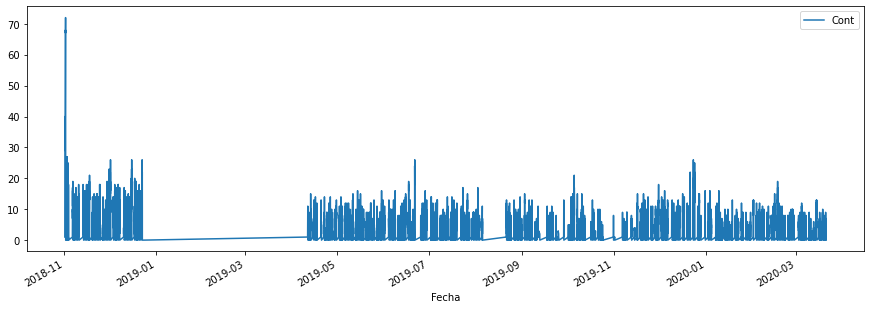

In [ ]:
dt=pd.concat([dtfI,dtfS])
dt.sort_index(inplace=True)
dt['Cont']=dt['conteo'].cumsum()
dt=dt[['Cont']]
dt.plot(figsize=(15,5))


In [ ]:
dt.head()

,Cont
Fecha,
2018-11-01 07:46:34,1
2018-11-01 07:48:15,2
2018-11-01 07:51:18,3
2018-11-01 07:51:58,4
2018-11-01 07:52:37,5


#Pasar datos a un excel

In [ ]:
#Data ocuapción por registros
import pandas as pd

toexcl = dt.reset_index()

toexcl.to_excel ('/content/Data.xlsx', index = False, header=True)

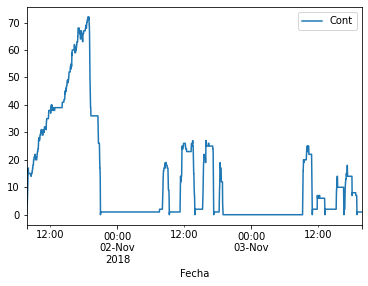

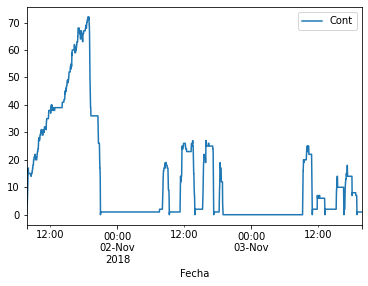

In [ ]:
#Data ocupacion por minutos
#Transformar base a minutos
toexclmin=dt.copy()
toexclmin=toexclmin.resample('T').last().bfill()
toexclmin.iloc[:3600,:].plot()
#a excel


toexclmin.to_excel ('/content/Data.xlsx', index = False, header=True)
toexclmin.iloc[:3600,:].plot()

#Visualización

In [ ]:
#Usar en caso de querer cargar una nueva base de datos
# format datetime column
#dtf["date"] = pd.to_datetime(dtf['Fecha'], format='%d.%m.%Y')
## create time series#
##ts = dtf.groupby("date")["Ocupación"].sum().rename("ocupa")
#ts.head()

In [ ]:
#ts.tail()

date
2020-03-20 16:53:05    4.0
2020-03-20 16:58:57    3.0
2020-03-20 17:11:08    2.0
2020-03-20 17:33:49    1.0
2020-03-20 17:37:22    0.0
Name: ocupa, dtype: float64

In [ ]:
##print("population --> len:", len(ts), "| mean:", round(ts.mean()), " | std:", round(ts.std()))
#w = 30
#print("moving --> len:", w, " | mean:", round(ts.ewm(span=w).mean()[-1]), " | std:", round(ts.ewm(span=w).std()[-1]))

population --> len: 31494 | mean: 7  | std: 6
moving --> len: 30  | mean: 4.0  | std: 2.0


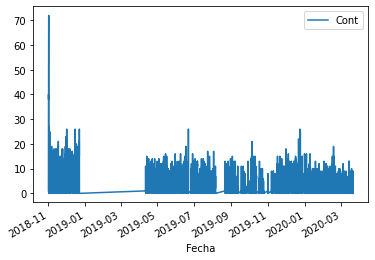

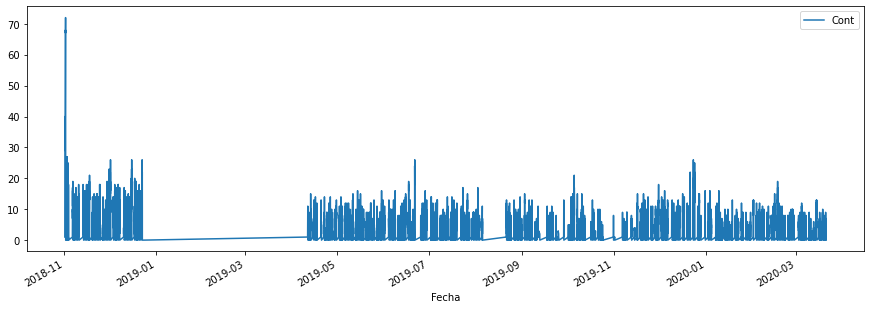

In [ ]:
from matplotlib import pyplot
dt.plot()
dt.plot(figsize=(15,5))
pyplot.show()

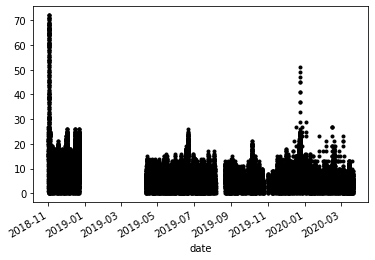

In [ ]:
dt.plot(style='k.')


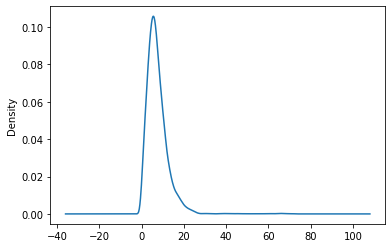

In [ ]:
dt.plot(kind='kde')
pyplot.show()

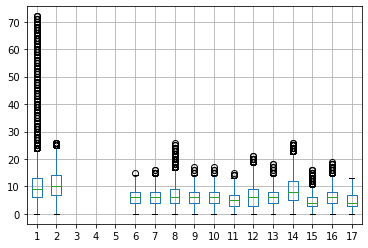

In [ ]:
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
groups = dt.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,18)
months.boxplot()
pyplot.show()

#ARIMA

In [ ]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For outliers detection
from sklearn import preprocessing, svm
## For stationarity test and decomposition
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [ ]:
#dt = dt.reset_index()
dt = dt[['Cont']]
dt.tail()

,Cont
Fecha,
2020-03-20 16:53:05,4
2020-03-20 16:58:57,3
2020-03-20 17:11:08,2
2020-03-20 17:33:49,1
2020-03-20 17:37:22,0


In [ ]:
from pmdarima import auto_arima
auto_arima(dt['Cont'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

In [ ]:
'''
Plot ts with rolling mean and 95% confidence interval with rolling std.
:parameter    
  :param ts: pandas Series    
  :param window: num - for rolling stats
  :param plot_ma: bool - whether plot moving average
  :param plot_intervals: bool - whether plot upper and lower bounds
'''
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

In [ ]:
plot_ts(dt, window=30)


AttributeError: ignored

<Figure size 1080x360 with 0 Axes>

In [ ]:
'''
Find outliers using sklearn unsupervised support vetcor machine.
:parameter
    :param ts: pandas Series
    :param perc: float - percentage of outliers to look for
:return
    dtf with raw ts, outlier 1/0 (yes/no), numeric index
'''
def find_outliers(ts, perc=0.01, figsize=(15,5)):
    ## fit svm
    scaler = preprocessing.StandardScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))
    model = svm.OneClassSVM(nu=perc, kernel="rbf", gamma=0.01)
    model.fit(ts_scaled)
    ## dtf output
    dtf_outliers = ts.to_frame(name="ts")
    dtf_outliers["index"] = range(len(ts))
    dtf_outliers["outlier"] = model.predict(ts_scaled)
    dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda
                                              x: 1 if x==-1 else 0)
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.set(title="Outliers detection: found"
           +str(sum(dtf_outliers["outlier"]==1)))
    ax.plot(dtf_outliers["index"], dtf_outliers["ts"],
            color="black")
    ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
               y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
               color='red')
    ax.grid(True)
    plt.show()
    return dtf_outliers

In [ ]:
'''
Interpolate outliers in a ts.
'''
def remove_outliers(ts, outliers_idx, figsize=(15,5)):
    ts_clean = ts.copy()
    ts_clean.loc[outliers_idx] = np.nan
    ts_clean = ts_clean.interpolate(method="linear")
    ax = ts.plot(figsize=figsize, color="red", alpha=0.5,
         title="Remove outliers", label="original", legend=True)
    ts_clean.plot(ax=ax, grid=True, color="black",
                  label="interpolated", legend=True)
    plt.show()
    return ts_clean

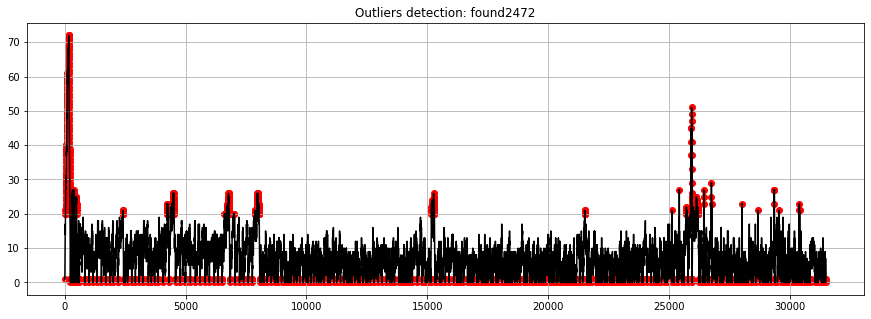

In [ ]:
dtf_outliers = find_outliers(ts, perc=0.05)

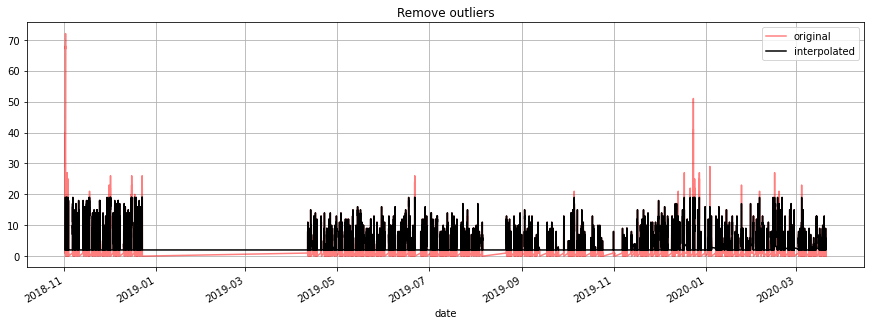

In [ ]:
## outliers index position
outliers_index_pos = dtf_outliers[dtf_outliers["outlier"]==1].index
## exclude outliers
ts_clean = remove_outliers(ts, outliers_idx=outliers_index_pos)

In [ ]:
'''
Test stationarity by:
    - running Augmented Dickey-Fuller test wiht 95%
    - plotting mean and variance of a sample from data
    - plottig autocorrelation and partial autocorrelation
'''
def test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30, figsize= 
                              (15,10)):
    with plt.style.context(style='bmh'):
        ## set figure
        fig = plt.figure(figsize=figsize)
        ts_ax = plt.subplot2grid(shape=(2,2), loc=(0,0), colspan=2)
        pacf_ax = plt.subplot2grid(shape=(2,2), loc=(1,0))
        acf_ax = plt.subplot2grid(shape=(2,2), loc=(1,1))
        
        ## plot ts with mean/std of a sample from the first x% 
        dtf_ts = ts.to_frame(name="ts")
        sample_size = int(len(ts)*sample)
        dtf_ts["mean"] = dtf_ts["ts"].head(sample_size).mean()
        dtf_ts["lower"] = dtf_ts["ts"].head(sample_size).mean() + dtf_ts["ts"].head(sample_size).std()
        dtf_ts["upper"] = dtf_ts["ts"].head(sample_size).mean() - dtf_ts["ts"].head(sample_size).std()
        dtf_ts["ts"].plot(ax=ts_ax, color="black", legend=False)
        dtf_ts["mean"].plot(ax=ts_ax, legend=False, color="red",
                            linestyle="--", linewidth=0.7)
        ts_ax.fill_between(x=dtf_ts.index, y1=dtf_ts['lower'], 
                y2=dtf_ts['upper'], color='lightskyblue', alpha=0.4)
        dtf_ts["mean"].head(sample_size).plot(ax=ts_ax,
                legend=False, color="red", linewidth=0.9)
        ts_ax.fill_between(x=dtf_ts.head(sample_size).index, 
                           y1=dtf_ts['lower'].head(sample_size), 
                           y2=dtf_ts['upper'].head(sample_size),
                           color='lightskyblue')
        
        ## test stationarity (Augmented Dickey-Fuller)
        adfuller_test = sm.tsa.stattools.adfuller(ts, maxlag=maxlag,
                                                  autolag="AIC")
        adf, p, critical_value = adfuller_test[0], adfuller_test[1], adfuller_test[4]["5%"]
        p = round(p, 3)
        conclusion = "Stationary" if p < 0.05 else "Non-Stationary"
        ts_ax.set_title('Dickey-Fuller Test 95%: '+conclusion+
                        '(p value: '+str(p)+')')
        
        ## pacf (for AR) e acf (for MA) 
        smt.graphics.plot_pacf(ts, lags=maxlag, ax=pacf_ax, 
                 title="Partial Autocorrelation (for AR component)")
        smt.graphics.plot_acf(ts, lags=maxlag, ax=acf_ax,
                 title="Autocorrelation (for MA component)")
        plt.tight_layout()

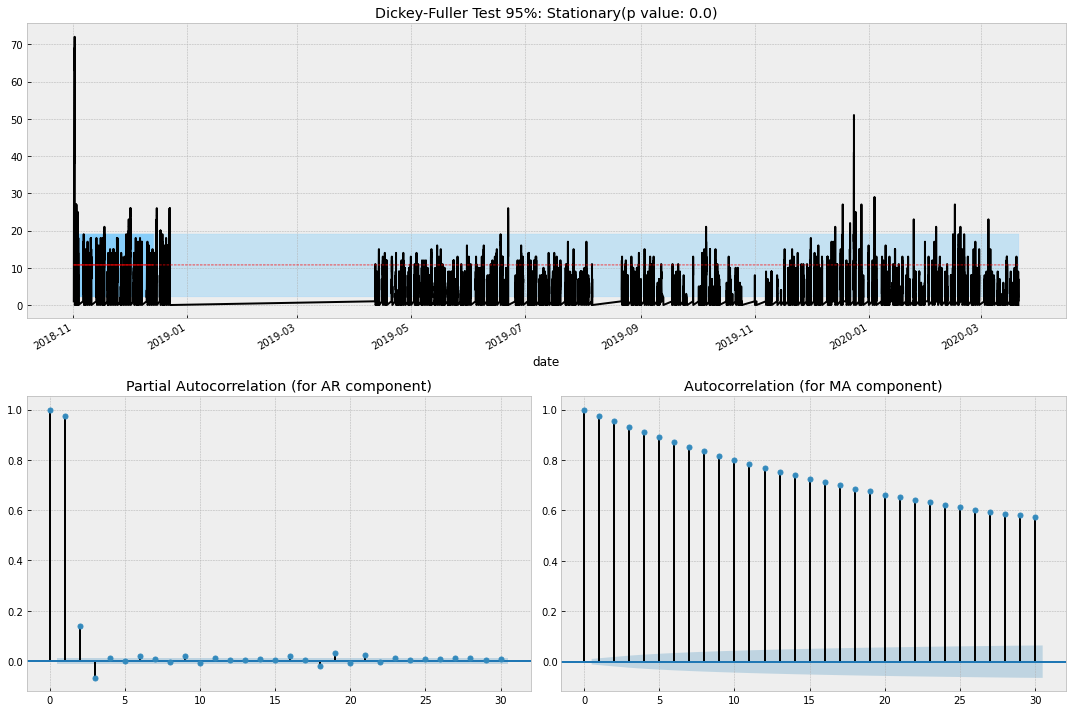

In [ ]:
test_stationarity_acf_pacf(ts, sample=0.20, maxlag=30)

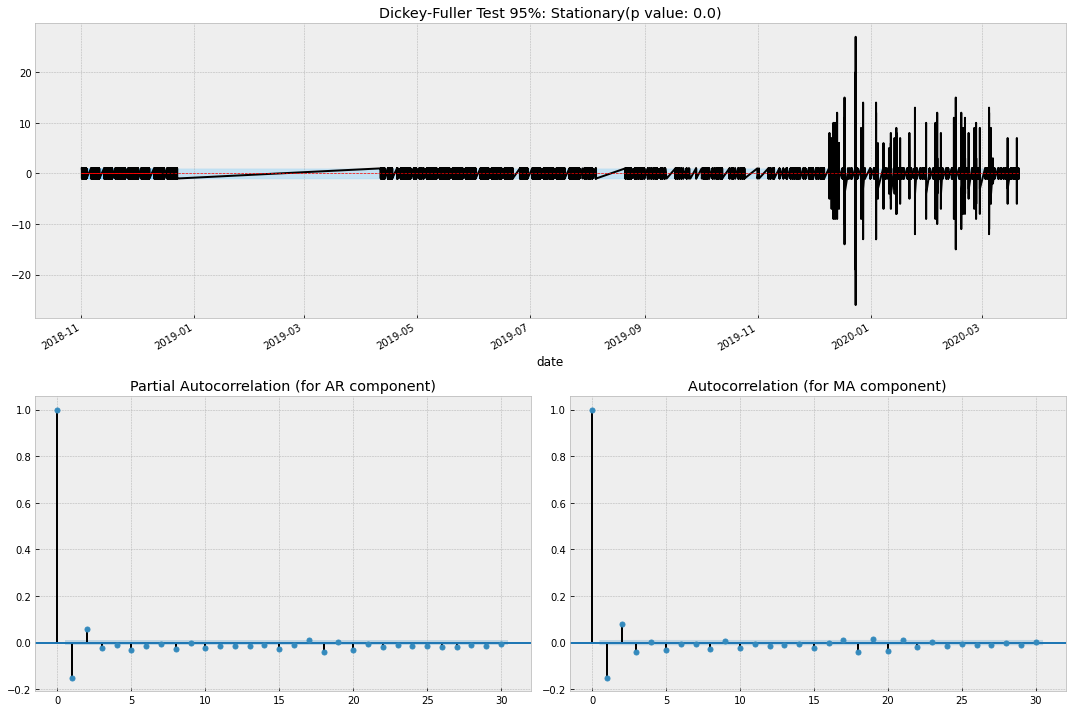

In [ ]:
diff_ts = ts - ts.shift(1)
diff_ts = diff_ts[(pd.notnull(diff_ts))]
test_stationarity_acf_pacf(diff_ts, sample=0.20, maxlag=30)

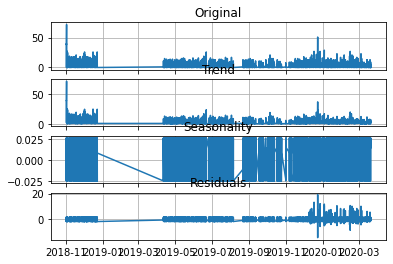

In [ ]:
decomposition = smt.seasonal_decompose(ts, freq=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid   
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=False)
ax[0].plot(ts)
ax[0].set_title('Original')
ax[0].grid(True) 
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[1].grid(True)  
ax[2].plot(seasonal)
ax[2].set_title('Seasonality')
ax[2].grid(True)  
ax[3].plot(residual)
ax[3].set_title('Residuals')
ax[3].grid(True)

In [ ]:
'''
Split train/test from any given data point.
:parameter
    :param ts: pandas Series
    :param test: num or str - test size (ex. 0.20) or index position
                 (ex. "yyyy-mm-dd", 1000)
:return
    ts_train, ts_test
'''
def split_train_test(ts, test=0.20, plot=True, figsize=(15,5)):
    ## define splitting point
    if type(test) is float:
        split = int(len(ts)*(1-test))
        perc = test
    elif type(test) is str:
        split = ts.reset_index()[ 
                      ts.reset_index().iloc[:,0]==test].index[0]
        perc = round(len(ts[split:])/len(ts), 2)
    else:
        split = test
        perc = round(len(ts[split:])/len(ts), 2)
    print("--- splitting at index: ", split, "|", 
          ts.index[split], "| test size:", perc, " ---")
    
    ## split ts
    ts_train = ts.head(split)
    ts_test = ts.tail(len(ts)-split)
    if plot is True:
        fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, 
                               sharey=True, figsize=figsize)
        ts_train.plot(ax=ax[0], grid=True, title="Train", 
                      color="black")
        ts_test.plot(ax=ax[1], grid=True, title="Test", 
                     color="black")
        ax[0].set(xlabel=None)
        ax[1].set(xlabel=None)
        plt.show()
        
    return ts_train, ts_test

In [ ]:
## format datetime column
dtf["date"] = pd.to_datetime(dtf['Fecha'], format='%d.%m.%Y')
## create time series
ts = dtf.groupby("date")["Ocupación"].sum().rename("ocupa")
ts.head()


date
2018-11-01 07:46:34    1
2018-11-01 07:48:15    2
2018-11-01 07:51:18    3
2018-11-01 07:51:58    4
2018-11-01 07:52:37    5
Name: ocupa, dtype: int64

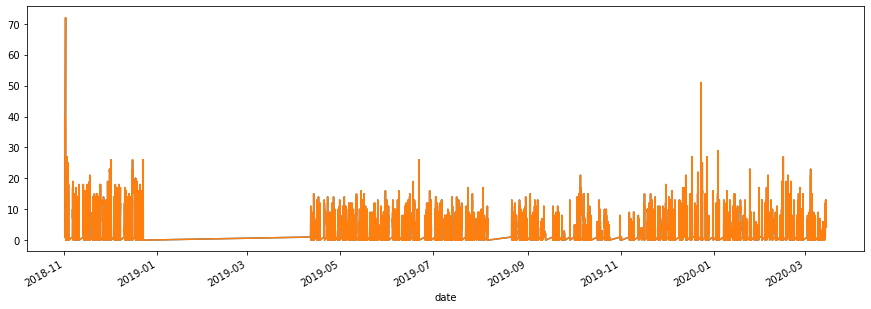

In [ ]:
train_data = ts[:len(ts)-500]
test_data = ts[len(ts)-500:]
from matplotlib import pyplot
train_data.plot()
train_data.plot(figsize=(15,5))
pyplot.show()

# PROPHET



In [ ]:
dtf = pd.read_excel('/content/MFull Hogar (72) (1).xlsx')
dtf_2=dtf[['Fecha','Ocupación']]

FileNotFoundError: ignored

In [ ]:
dtf_2
dtf_2['Datetime'] = pd.to_datetime(dtf_2['Fecha'])
dtf_2= dtf_2.set_index('Datetime')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#dtf_2.info()
dft_3=dtf_2[['Ocupación']]
dft_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31668 entries, 2018-11-01 07:46:34 to 2020-03-20 17:37:22
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Ocupación  31668 non-null  int64
dtypes: int64(1)
memory usage: 494.8 KB


In [ ]:


df_pr = dft_3.copy()
df_pr = dft_3.reset_index()
df_pr

,Datetime,Ocupación
0,2018-11-01 07:46:34,1
1,2018-11-01 07:48:15,2
2,2018-11-01 07:51:18,3
3,2018-11-01 07:51:58,4
4,2018-11-01 07:52:37,5
...,...,...
31663,2020-03-20 16:53:05,4
31664,2020-03-20 16:58:57,3
31665,2020-03-20 17:11:08,2
31666,2020-03-20 17:33:49,1


In [ ]:
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(dft_3)-1000]
test_data_pr = df_pr.iloc[len(dft_3)-1000:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1000,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
30506,2020-11-01 15:34:12,-5.013905,-137.897449,128.366934,-135.931918,129.000968,-1.239151,-1.239151,-1.239151,1.295968,1.295968,1.295968,-2.535119,-2.535119,-2.535119,0.0,0.0,0.0,-6.253056
30507,2020-12-01 15:34:12,-6.151801,-163.481176,154.925090,-164.439381,154.230640,1.731684,1.731684,1.731684,1.295968,1.295968,1.295968,0.435716,0.435716,0.435716,0.0,0.0,0.0,-4.420118
30508,2021-01-01 15:34:12,-7.327627,-191.464400,188.674147,-192.319377,185.657258,1.543747,1.543747,1.543747,1.295968,1.295968,1.295968,0.247779,0.247779,0.247779,0.0,0.0,0.0,-5.783881
30509,2021-02-01 15:34:12,-8.503454,-218.496593,219.404327,-224.263156,217.386301,1.714853,1.714853,1.714853,1.295968,1.295968,1.295968,0.418886,0.418886,0.418886,0.0,0.0,0.0,-6.788600
30510,2021-03-01 15:34:12,-9.565490,-253.842924,247.617977,-255.465949,244.372064,1.714853,1.714853,1.714853,1.295968,1.295968,1.295968,0.418886,0.418886,0.418886,0.0,0.0,0.0,-7.850637


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-1000:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
2020-04-01 16:09:41,4.214000
2020-05-01 16:09:41,3.740836
2020-06-01 16:09:41,2.559589
2020-07-01 16:09:41,0.172405
2020-08-01 16:09:41,1.077898
2020-09-01 16:09:41,-1.799169
2020-10-01 16:09:41,-3.046864
2020-11-01 16:09:41,-7.281866
2020-12-01 16:09:41,-5.840764


In [ ]:
train_data = dtf[:len(dtf)-1000]
test_data = dtf[len(dtf)-1000:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



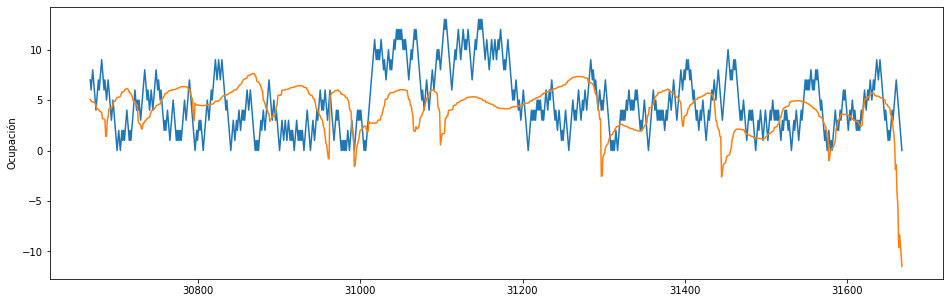

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Ocupación"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Ocupación'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = dtf['Ocupación'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 13.646758151987077
RMSE Error: 3.694151885343519
Mean: 7.412529998736895


# SERIA BUENO USAR ESTA GRAFICA

In [ ]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

NameError: ignored

#LSTM

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

df=pd.read_excel('/content/MFull_Hogar.xlsx', index_col=0) 
print(df)

                     Ocupacion
Fecha                         
2018-11-01 07:46:34          1
2018-11-01 07:48:15          2
2018-11-01 07:51:18          3
2018-11-01 07:51:58          4
2018-11-01 07:52:37          5
...                        ...
2020-03-20 16:53:05          4
2020-03-20 16:58:57          3
2020-03-20 17:11:08          2
2020-03-20 17:33:49          1
2020-03-20 17:37:22          0

[31668 rows x 1 columns]


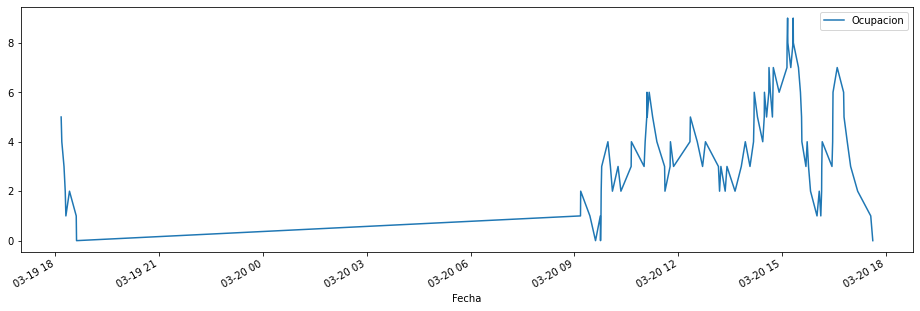

In [ ]:
train_data = df[:len(df)-100]
test_data = df[len(df)-100:]
test_data['Ocupacion'].plot(figsize = (16,5), legend=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 50
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input,batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input,n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
31518/31518 [==============================] - 1004s 32ms/step - loss: 4227967.5000
Epoch 2/5
31518/31518 [==============================] - 994s 32ms/step - loss: 2.1275e-04
Epoch 3/5
31518/31518 [==============================] - 989s 31ms/step - loss: 2.0172e-04
Epoch 4/5
31518/31518 [==============================] - 1006s 32ms/step - loss: 2.0016e-04
Epoch 5/5
31518/31518 [==============================] - 994s 32ms/step - loss: 1.9958e-04


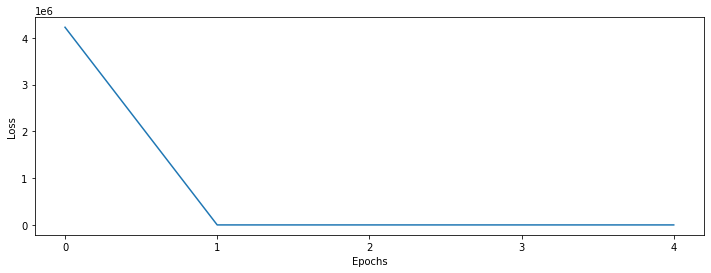

In [ ]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [ ]:
lstm_predictions_scaled

[array([0.04986132], dtype=float32),
 array([0.04516099], dtype=float32),
 array([0.04211802], dtype=float32),
 array([0.04055884], dtype=float32),
 array([0.04010836], dtype=float32),
 array([0.04034727], dtype=float32),
 array([0.04091252], dtype=float32),
 array([0.04154355], dtype=float32),
 array([0.04208659], dtype=float32),
 array([0.04247525], dtype=float32),
 array([0.04270294], dtype=float32),
 array([0.04279666], dtype=float32),
 array([0.0427967], dtype=float32),
 array([0.0427431], dtype=float32),
 array([0.04266832], dtype=float32),
 array([0.04259458], dtype=float32),
 array([0.04253429], dtype=float32),
 array([0.04249204], dtype=float32),
 array([0.04246721], dtype=float32),
 array([0.04245634], dtype=float32),
 array([0.042455], dtype=float32),
 array([0.04245905], dtype=float32),
 array([0.04246524], dtype=float32),
 array([0.04247137], dtype=float32),
 array([0.04247628], dtype=float32),
 array([0.04247956], dtype=float32),
 array([0.0424813], dtype=float32),
 array

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions= lstm_predictions.astype(int) 
lstm_predictions

array([[3],
       [3],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
    

In [ ]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ocupacion,LSTM_Predictions
Fecha,,
2020-03-19 18:09:56,5,3
2020-03-19 18:11:04,4,3
2020-03-19 18:14:52,3,3
2020-03-19 18:17:00,2,2
2020-03-19 18:18:08,1,2
...,...,...
2020-03-20 16:53:05,4,3
2020-03-20 16:58:57,3,3
2020-03-20 17:11:08,2,3


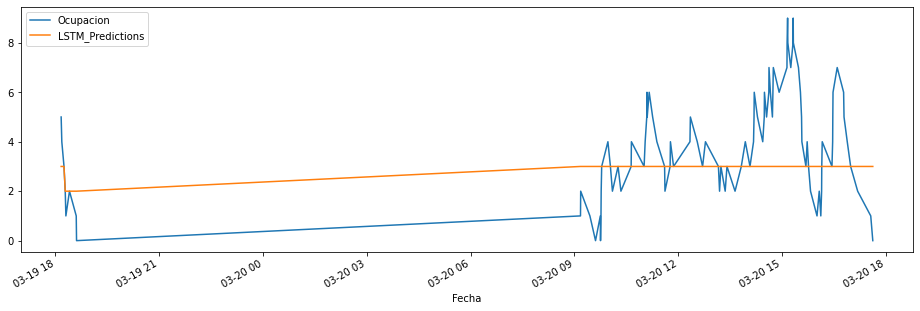

In [ ]:
test_data['Ocupacion'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [ ]:
lstm_rmse_error = rmse(test_data['Ocupacion'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Ocupacion'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 5.09
RMSE Error: 2.2561028345356955
Mean: 7.412529998736895


#PyTorch Data Clima

```
# Esto tiene formato de código**
```




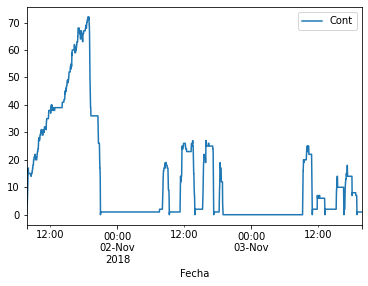

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()

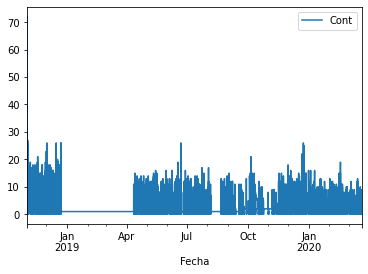

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.plot()

In [ ]:
dtmin['diasem']=dtmin.index.to_series().dt.dayofweek
dtmin.tail()

,Cont,diasem
Fecha,,
2020-03-20 17:33:00,1.0,4
2020-03-20 17:34:00,0.0,4
2020-03-20 17:35:00,0.0,4
2020-03-20 17:36:00,0.0,4
2020-03-20 17:37:00,0.0,4


In [ ]:
##Incluir festivos
Fest = pd.read_excel('/content/drive/My Drive/colab bases/festivosCol2018-2020.xlsx')
Fest['Festivos']=pd.to_datetime(Fest['Festivos'])
Fest.dtypes


Festivos    datetime64[ns]
dtype: object

In [ ]:
dtmin['Festivo']=0
dtmin['Festivo'][dtmin.index.to_series().dt.date.isin(Fest['Festivos'].dt.date)]=1
dtmin[dtmin['Festivo']==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo
Fecha,,,
2018-11-05 00:00:00,1.0,0,1
2018-11-05 00:01:00,1.0,0,1
2018-11-05 00:02:00,1.0,0,1
2018-11-05 00:03:00,1.0,0,1
2018-11-05 00:04:00,1.0,0,1
...,...,...,...
2020-02-24 23:55:00,1.0,0,1
2020-02-24 23:56:00,1.0,0,1
2020-02-24 23:57:00,1.0,0,1


In [ ]:
#Clima
Clima = pd.read_excel('/content/drive/My Drive/colab bases/Meteorológico.xlsx')
Clima = Clima[['Fecha','Valor']]
Clima['Fecha']=pd.to_datetime(Clima['Fecha']).dt.date
Clima.set_index('Fecha',inplace=True)
Clima.head()

,Valor
Fecha,
2018-08-25,1
2018-08-26,10
2018-08-27,3
2018-08-28,23
2018-08-29,5


In [ ]:
dtmin['Fecha1'] = dtmin.index.to_series().dt.date
base = dtmin.join(Clima,on='Fecha1',how='left')
base= base[['Cont','diasem','Festivo','Valor']]
base['hora'] = base.index.to_series().dt.hour
base.tail()

,Cont,diasem,Festivo,Valor,hora
Fecha,,,,,
2020-03-20 17:33:00,1.0,4,0,4,17
2020-03-20 17:34:00,0.0,4,0,4,17
2020-03-20 17:35:00,0.0,4,0,4,17
2020-03-20 17:36:00,0.0,4,0,4,17
2020-03-20 17:37:00,0.0,4,0,4,17


In [ ]:
base.isna().sum()

Cont       0
diasem     0
Festivo    0
Valor      0
hora       0
dtype: int64

In [ ]:
basetorch = base.copy()
basetorch['Predict']=np.nan
basetorch['Predict'][:-1] = basetorch['Cont'][1:]
basetorch=basetorch[:-1]
basetorch.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2018-11-01 07:46:00,1.0,3,0,0,7,2.0
2018-11-01 07:47:00,2.0,3,0,0,7,2.0
2018-11-01 07:48:00,2.0,3,0,0,7,4.0
2018-11-01 07:49:00,4.0,3,0,0,7,4.0
2018-11-01 07:50:00,4.0,3,0,0,7,4.0


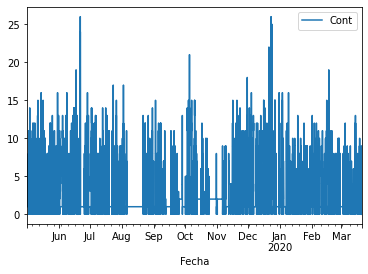

In [ ]:
#Quitar fechas ruido
fechas = basetorch.index.to_series()
basetorch = basetorch[(fechas>'2019-05-01')]
basetorch[['Cont']].plot()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class REDTORCH(nn.Module):
    def __init__(self, inputs, hidden, outputs):
        super(REDTORCH, self).__init__()
        self.linear1 = nn.Linear(inputs, hidden)
        self.linear2 = nn.Linear(hidden, outputs)

    def forward(self, x):
        h_linear = self.linear1(x)
        y_pred = self.linear2(h_linear)
        return F.relu(y_pred)

In [ ]:
modeloto=REDTORCH(5,16,1)

In [ ]:
maximoclima = basetorch['Valor'].max()
basetorch['Valor']=basetorch['Valor']/maximoclima
maximoC = basetorch['Cont'].max()
basetorch['Cont']=basetorch['Cont']/maximoC
basetorch['Predict']=basetorch['Predict']/maximoC
basetorch['diasem']=basetorch['diasem']/7
basetorch['Festivo']=basetorch['Festivo']/1
basetorch['hora']=basetorch['hora']/24
basetorch.head()

,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2019-05-01 00:01:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:02:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:03:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:04:00,0.038462,0.285714,1.0,0.5,0.0,0.038462
2019-05-01 00:05:00,0.038462,0.285714,1.0,0.5,0.0,0.038462


In [ ]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(modeloto.parameters(), lr=0.01)

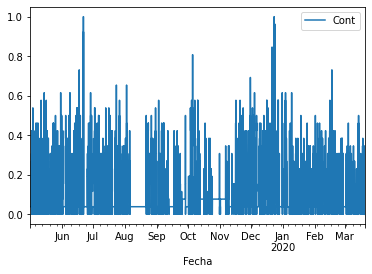

In [ ]:
basetorch[['Cont']].plot()

In [ ]:
entrada = basetorch[['Cont','diasem','Festivo','Valor','hora']].values
salida = basetorch[['Predict']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entrada, salida, test_size=0.33)
X_train=torch.from_numpy(X_train).type(torch.float)
y_train=torch.from_numpy(y_train).type(torch.float)
X_test=torch.from_numpy(X_test).type(torch.float)
y_test=torch.from_numpy(y_test).type(torch.float)

In [ ]:
for  i  in range (1000):
  modeloto.zero_grad()
  pred = modeloto(X_train)
  loss = criterion(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

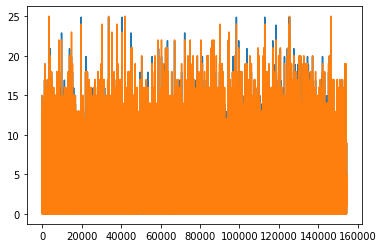

In [ ]:
predichos = modeloto(X_test)
plt.plot(predichos.detach().numpy()*maximoC)
plt.plot(y_test.detach().numpy()*maximoC)


In [ ]:
np.sqrt(np.power(predichos.detach().numpy()-y_test.detach().numpy(),2).mean())*maximoC

0.23093866184353828

Modelo Torch #2 fecha ant

In [ ]:
basetorch2 = base.copy()
basetorch2['Predict']=np.nan
basetorch2['Predict'][:-3600] = basetorch2['Cont'][3600:]
basetorch=basetorch2[:-3600]
basetorch2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2018-11-01 07:46:00,1.0,3,0,0,7,1.0
2018-11-01 07:47:00,2.0,3,0,0,7,1.0
2018-11-01 07:48:00,2.0,3,0,0,7,1.0
2018-11-01 07:49:00,4.0,3,0,0,7,1.0
2018-11-01 07:50:00,4.0,3,0,0,7,1.0


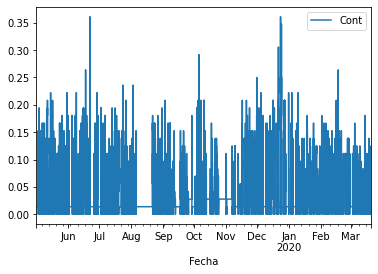

In [ ]:
#Quitar fechas ruido
fechas = basetorch2.index.to_series()
basetorch2 = basetorch2[(fechas>'2019-05-01')]
basetorch2[['Cont']].plot()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

class REDTORCH(nn.Module):
    def __init__(self, inputs, hidden, outputs):
        super(REDTORCH, self).__init__()
        self.linear1 = nn.Linear(inputs, hidden)
        self.linear2 = nn.Linear(hidden, outputs)

    def forward(self, x):
        h_linear = self.linear1(x)
        y_pred = self.linear2(h_linear)
        return F.relu(y_pred)

In [ ]:
modeloto=REDTORCH(5,16,1)

In [ ]:
maximoclima = basetorch2['Valor'].max()
basetorch2['Valor']=basetorch2['Valor']/maximoclima
maximoC = basetorch2['Cont'].max()
basetorch2['Cont']=basetorch2['Cont']/maximoC
basetorch2['Predict']=basetorch2['Predict']/maximoC
basetorch2['diasem']=basetorch2['diasem']/7
basetorch2['Festivo']=basetorch2['Festivo']/1
basetorch2['hora']=basetorch2['hora']/24
basetorch2.head()

,Cont,diasem,Festivo,Valor,hora,Predict
Fecha,,,,,,
2018-11-01 07:46:00,0.013889,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:47:00,0.027778,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:48:00,0.027778,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:49:00,0.055556,0.428571,0.0,0.0,0.291667,0.013889
2018-11-01 07:50:00,0.055556,0.428571,0.0,0.0,0.291667,0.013889


In [ ]:
entrada = basetorch2[['Cont','diasem','Festivo','Valor','hora']].values
salida = basetorch2[['Predict']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(entrada, salida, test_size=0.33)
X_train=torch.from_numpy(X_train).type(torch.float)
y_train=torch.from_numpy(y_train).type(torch.float)
X_test=torch.from_numpy(X_test).type(torch.float)
y_test=torch.from_numpy(y_test).type(torch.float)

In [ ]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(modeloto.parameters(), lr=0.01)

In [ ]:
for  i  in range (1000):
  modeloto.zero_grad()
  pred = modeloto(X_train)
  loss = criterion(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

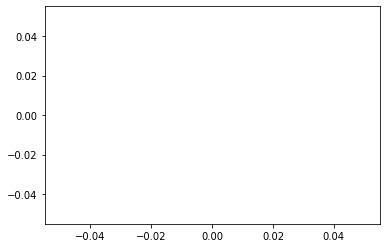

In [ ]:
predichos = modeloto(X_test)
plt.plot(predichos.detach().numpy()*maximoC)
#plt.plot(y_test.detach().numpy()*maximoC)

In [ ]:
np.sqrt(np.power(predichos.detach().numpy()-y_test.detach().numpy(),2).mean())*maximoC

nan



```
# Esto tiene formato de código
```

#Prophet base minutos 1000 mins

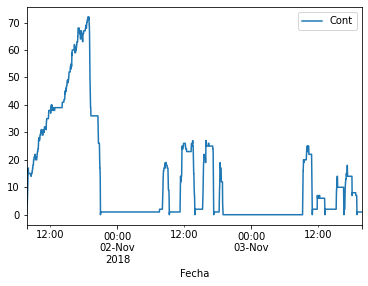

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.head()

,Cont
Fecha,
2018-11-01 07:46:00,1.0
2018-11-01 07:47:00,2.0
2018-11-01 07:48:00,2.0
2018-11-01 07:49:00,4.0
2018-11-01 07:50:00,4.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-02-01')]
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

,Fecha,Cont
70172,2020-03-20 17:33:00,1.0
70173,2020-03-20 17:34:00,0.0
70174,2020-03-20 17:35:00,0.0
70175,2020-03-20 17:36:00,0.0
70176,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-1000]
test_data_pr = df_pr.iloc[len(df_pr)-1000:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1000,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70172,2020-03-20 17:33:00,2.504375,3.069671,7.046865,2.445645,2.572888,2.553937,2.553937,2.553937,2.086758,2.086758,2.086758,0.467180,0.467180,0.467180,0.0,0.0,0.0,5.058313
70173,2020-03-20 17:34:00,2.504449,3.106507,6.995409,2.445493,2.573364,2.534800,2.534800,2.534800,2.066593,2.066593,2.066593,0.468207,0.468207,0.468207,0.0,0.0,0.0,5.039249
70174,2020-03-20 17:35:00,2.504523,2.975674,6.781064,2.445341,2.573841,2.515511,2.515511,2.515511,2.046278,2.046278,2.046278,0.469234,0.469234,0.469234,0.0,0.0,0.0,5.020034
70175,2020-03-20 17:36:00,2.504596,3.034407,6.959299,2.445189,2.574317,2.496075,2.496075,2.496075,2.025814,2.025814,2.025814,0.470260,0.470260,0.470260,0.0,0.0,0.0,5.000671
70176,2020-03-20 17:37:00,2.504670,3.020580,6.938173,2.445037,2.574769,2.476493,2.476493,2.476493,2.005206,2.005206,2.005206,0.471287,0.471287,0.471287,0.0,0.0,0.0,4.981163


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-1000:]['ds'], "Pred" : prophet_pred[-1000:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-20 00:58:00,1.366023
2020-03-20 00:59:00,1.363949
2020-03-20 01:00:00,1.361904
2020-03-20 01:01:00,1.359891
2020-03-20 01:02:00,1.357909
...,...
2020-03-20 17:33:00,5.058313
2020-03-20 17:34:00,5.039249
2020-03-20 17:35:00,5.020034


In [ ]:
train_data = dtmin[:len(dtmin)-1000]
test_data = dtmin[len(dtmin)-1000:]

NameError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



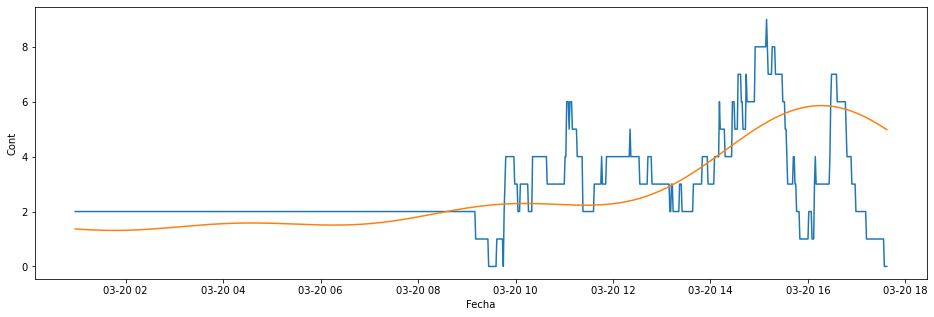

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = dtmin['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.307764841151645
RMSE Error: 1.5191329241220615
Mean: 2.0733258953107483


#Prophet base minutos 5 días 7800 minutos

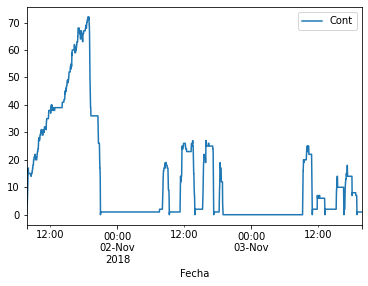

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.head()

,Cont
Fecha,
2018-11-01 07:46:00,1.0
2018-11-01 07:47:00,2.0
2018-11-01 07:48:00,2.0
2018-11-01 07:49:00,4.0
2018-11-01 07:50:00,4.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2020-02-01')]
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

,Fecha,Cont
70172,2020-03-20 17:33:00,1.0
70173,2020-03-20 17:34:00,0.0
70174,2020-03-20 17:35:00,0.0
70175,2020-03-20 17:36:00,0.0
70176,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-7200]
test_data_pr = df_pr.iloc[len(df_pr)-7200:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=72000,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
134972,2020-05-04 17:33:00,6.065652,-190.490093,212.065877,-192.229828,210.214875,2.350055,2.350055,2.350055,2.114073,2.114073,2.114073,0.235982,0.235982,0.235982,0.0,0.0,0.0,8.415707
134973,2020-05-04 17:34:00,6.065709,-190.158208,210.980246,-192.233500,210.217848,2.330296,2.330296,2.330296,2.093873,2.093873,2.093873,0.236423,0.236423,0.236423,0.0,0.0,0.0,8.396006
134974,2020-05-04 17:35:00,6.065767,-190.706065,211.318195,-192.237173,210.220820,2.310390,2.310390,2.310390,2.073526,2.073526,2.073526,0.236864,0.236864,0.236864,0.0,0.0,0.0,8.376157
134975,2020-05-04 17:36:00,6.065825,-190.418304,211.234323,-192.240845,210.223792,2.290338,2.290338,2.290338,2.053036,2.053036,2.053036,0.237302,0.237302,0.237302,0.0,0.0,0.0,8.356164
134976,2020-05-04 17:37:00,6.065883,-190.003846,213.758720,-192.244518,210.226764,2.270146,2.270146,2.270146,2.032406,2.032406,2.032406,0.237740,0.237740,0.237740,0.0,0.0,0.0,8.336029


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7200:]['ds'], "Pred" : prophet_pred[-7200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-04-29 17:38:00,7.294731
2020-04-29 17:39:00,7.274301
2020-04-29 17:40:00,7.253741
2020-04-29 17:41:00,7.233055
2020-04-29 17:42:00,7.212246
...,...
2020-05-04 17:33:00,8.415707
2020-05-04 17:34:00,8.396006
2020-05-04 17:35:00,8.376157


In [ ]:
train_data = dtmin[:len(dtmin)-7200]
test_data = dtmin[len(dtmin)-7200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



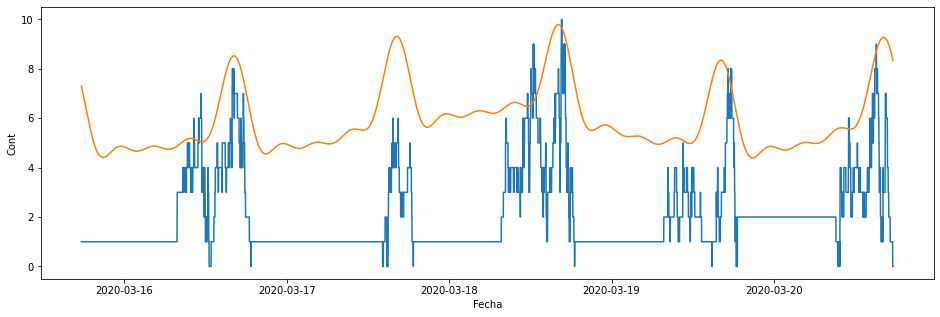

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = dtmin['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 16.830215332302146
RMSE Error: 4.102464543698354
Mean: 2.0733258953107483


#Prophet base minutos largo plazo 1000 mins


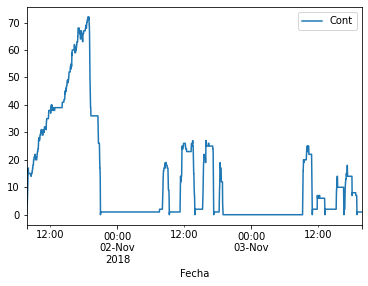

In [ ]:
##Transformar base a minutos
dtmin=dt.copy()
dtmin=dtmin.resample('T').last().bfill()
dtmin.iloc[:3600,:].plot()


In [ ]:
dtmin.head()

,Cont
Fecha,
2018-11-01 07:46:00,1.0
2018-11-01 07:47:00,2.0
2018-11-01 07:48:00,2.0
2018-11-01 07:49:00,4.0
2018-11-01 07:50:00,4.0


In [ ]:
prophbas = dtmin.copy()
#Quitar fechas ruido
fechas = prophbas.index.to_series()
df_pr = prophbas[(fechas>'2019-09-01')]
#df_pr[['Cont']].plot()
df_pr = df_pr.reset_index()
df_pr.tail()

,Fecha,Cont
290492,2020-03-20 17:33:00,1.0
290493,2020-03-20 17:34:00,0.0
290494,2020-03-20 17:35:00,0.0
290495,2020-03-20 17:36:00,0.0
290496,2020-03-20 17:37:00,0.0


In [ ]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df_pr)-1200]
test_data_pr = df_pr.iloc[len(df_pr)-1200:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=1200,freq='min')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
290492,2020-03-20 17:33:00,1.582123,1.442465,5.795220,1.582123,1.582123,2.018703,2.018703,2.018703,1.951353,1.951353,1.951353,0.067350,0.067350,0.067350,0.0,0.0,0.0,3.600827
290493,2020-03-20 17:34:00,1.582113,1.386848,5.734755,1.582113,1.582113,1.999878,1.999878,1.999878,1.932044,1.932044,1.932044,0.067833,0.067833,0.067833,0.0,0.0,0.0,3.581991
290494,2020-03-20 17:35:00,1.582103,1.405169,5.752845,1.582103,1.582103,1.980904,1.980904,1.980904,1.912587,1.912587,1.912587,0.068317,0.068317,0.068317,0.0,0.0,0.0,3.563007
290495,2020-03-20 17:36:00,1.582092,1.085674,5.668818,1.582092,1.582092,1.961785,1.961785,1.961785,1.892984,1.892984,1.892984,0.068801,0.068801,0.068801,0.0,0.0,0.0,3.543878
290496,2020-03-20 17:37:00,1.582082,1.365017,5.684821,1.582082,1.582082,1.942525,1.942525,1.942525,1.873240,1.873240,1.873240,0.069285,0.069285,0.069285,0.0,0.0,0.0,3.524607


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-1200:]['ds'], "Pred" : prophet_pred[-1200:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "min"
prophet_pred

,Pred
Date,
2020-03-19 21:38:00,0.726363
2020-03-19 21:39:00,0.730560
2020-03-19 21:40:00,0.734789
2020-03-19 21:41:00,0.739048
2020-03-19 21:42:00,0.743334
...,...
2020-03-20 17:33:00,3.600827
2020-03-20 17:34:00,3.581991
2020-03-20 17:35:00,3.563007


In [ ]:
train_data = dtmin[:len(dtmin)-1200]
test_data = dtmin[len(dtmin)-1200:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



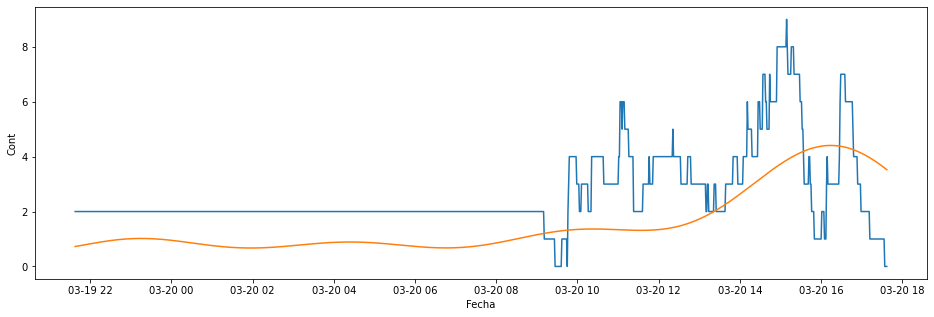

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Cont"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

prophet_rmse_error = rmse(test_data['Cont'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = dtmin['Cont'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.8170931563150963
RMSE Error: 1.6784198391091236
Mean: 2.0733258953107483


#LSTM con variables exogenas

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)
import datetime as dt
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

2.3.0


In [ ]:
data_end = dt.copy()
data_end=data_end.resample('T').last().bfill()
#Incluir Dia semana
data_end['diasem']=data_end.index.to_series().dt.dayofweek
##Incluir festivos
Fest = pd.read_excel('/content/drive/My Drive/colab bases/festivosCol2018-2020.xlsx')
Fest['Festivos']=pd.to_datetime(Fest['Festivos'])
data_end['Festivo']=0
data_end['Festivo'][data_end.index.to_series().dt.date.isin(Fest['Festivos'].dt.date)]=1
data_end[data_end['Festivo']==1]
#Clima
Clima = pd.read_excel('/content/drive/My Drive/colab bases/Meteorológico.xlsx')
Clima = Clima[['Fecha','Valor']]
Clima['Fecha']=pd.to_datetime(Clima['Fecha']).dt.date
Clima.set_index('Fecha',inplace=True)
data_end['Fecha1'] = data_end.index.to_series().dt.date
data_end = data_end.join(Clima,on='Fecha1',how='left')
data_end = data_end[['Cont','diasem','Festivo','Valor']]
#hora del dia
data_end['hora'] = data_end.index.to_series().dt.hour
data_end.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Cont,diasem,Festivo,Valor,hora
Fecha,,,,,
2020-03-20 17:33:00,1.0,4,0,4,17
2020-03-20 17:34:00,0.0,4,0,4,17
2020-03-20 17:35:00,0.0,4,0,4,17
2020-03-20 17:36:00,0.0,4,0,4,17
2020-03-20 17:37:00,0.0,4,0,4,17


In [ ]:
#Escalar las variables para usar redes neuronales ('Datos pequeños')
maximoclima = data_end['Valor'].max()
data_end['Valor']=data_end['Valor']/maximoclima
maximoC = data_end['Cont'].max()
data_end['Cont']=data_end['Cont']/maximoC
data_end['diasem']=data_end['diasem']/7
data_end['Festivo']=data_end['Festivo']/1
data_end['hora']=data_end['hora']/24
data_end.head()

,Cont,diasem,Festivo,Valor,hora
Fecha,,,,,
2018-11-01 07:46:00,0.013889,0.428571,0.0,0.0,0.291667
2018-11-01 07:47:00,0.027778,0.428571,0.0,0.0,0.291667
2018-11-01 07:48:00,0.027778,0.428571,0.0,0.0,0.291667
2018-11-01 07:49:00,0.055556,0.428571,0.0,0.0,0.291667
2018-11-01 07:50:00,0.055556,0.428571,0.0,0.0,0.291667


In [ ]:
# Dividir multivariables en muestras
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		end_ix = i + n_steps
		if end_ix > len(sequences):
			break
		seq_x, seq_y = sequences[i:end_ix-1], sequences[end_ix-1, 0]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
data_end1 = np.array(data_end)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
##ventanas
n_steps = 18
# convertir en entrada/salida
X, y = split_sequences(data_end1, n_steps+1)
print(X.shape, y.shape)

n_features = X.shape[2]

model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True),
                      input_shape=[n_steps, n_features]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1),
])

model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X, y, epochs=300, verbose=0)

forecast = []
for time in range(len(data_end1) - n_steps):
  if time==0:
    a=data_end1[time:time + n_steps]
    b=model.predict(a[np.newaxis])
    forecast.append(model.predict(a[np.newaxis]))
  else:
    a=np.append(a[1:],np.append(b[:,0],data_end1[n_steps+time,1:])[np.newaxis],axis=0)
    b=model.predict(a[np.newaxis])
    forecast.append(model.predict(a[np.newaxis]))

a=np.array(forecast)[:,0,0]
a=pd.DataFrame(a)
a.index=pd.date_range(start=date(2019, 1, 1) + relativedelta(months = n_steps+1), end='03/1/2020', freq='min')

predicciones = pd.merge(a, pd.DataFrame(data_end.iloc[:, 0]), left_index=True, right_index=True)
predicciones

predicciones.plot()
plt.show()


(727774, 18, 5) (727774,)


#Codigo ciclo por celdas

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 9.4MB/s 
     |████████████████████████████████| 2.1MB 40.6MB/s 
     |████████████████████████████████| 9.5MB 40.4MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)
import datetime as dt
from datetime import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import logging
import numpy as np
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For Arima
import pmdarima
import statsmodels.tsa.api as smt
## For Lstm
from tensorflow.keras import models, layers, preprocessing as kprocessing
## For Prophet
from fbprophet import Prophet
# For errors
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


2.3.0


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cargue = pd.read_csv("/content/drive/My Drive/colab bases/Consolidado General 11_2018-06_2020.csv",encoding='latin1', delimiter=';')
#df = pd.cargue({
    #'Codigo Zona': ['DOMICILIO/CARGUE']})
cargue['Codigo Zona'] =np.where((cargue['Codigo Zona']== 'DOMICILIOS/CARGUE'),'DOMICILIOS_CARGUE',cargue['Codigo Zona'])
cargue.head(15)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.



,Id Registro,Operador ingreso,Operador salida,Codigo Zona,Placa,Tipo vehículo,Fecha ingreso,Hora ingreso,Fecha salida,Hora salida,Impulsador TR,Fecha TR,Total minutos,Valor,Num. Factura,Tarifa,Estado factura
0,5810628,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,EHL999,Automoviles,2018-11-01 07:01:53,07:01:53,2018-11-01 07:14:47,07:14:47,NaN,NaN,0h 12m 54s,800,NaN,CARRO ZER CALDAS,Tiquete pago
1,5810635,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,FCY730,Automoviles,2018-11-01 07:02:23,07:02:23,2018-11-01 18:25:24,18:25:24,NaN,NaN,11h 23m 1s,36800,NaN,CARRO ZER CALDAS,Tiquete pago
2,5822823,EDER ECHEVERRY GALEANO,EDER ECHEVERRY GALEANO,EL ABUELO Y SON & SORBO,HNV201,Automoviles,2018-11-01 07:35:28,07:35:28,2018-11-01 18:49:40,18:49:40,NaN,NaN,11h 14m 12s,36000,NaN,CARRO ZER CALDAS,Tiquete pago
3,5811677,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WUX03C,Motos,2018-11-01 07:46:34,07:46:34,2018-11-01 12:12:11,12:12:11,NaN,NaN,4h 25m 37s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
4,5811679,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,ZHA49A,Motos,2018-11-01 07:48:15,07:48:15,2018-11-01 20:58:34,20:58:34,NaN,NaN,13h 10m 19s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
5,5811680,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,HBG80D,Motos,2018-11-01 07:51:18,07:51:18,2018-11-01 20:58:09,20:58:09,NaN,NaN,13h 6m 51s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
6,5811678,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,MBG26C,Motos,2018-11-01 07:51:58,07:51:58,2018-11-01 12:17:22,12:17:22,NaN,NaN,4h 25m 24s,4500,NaN,MOTOS ZER CALDAS,Tiquete pago
7,5811681,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,PIX35E,Motos,2018-11-01 07:52:37,07:52:37,2018-11-01 20:58:23,20:58:23,NaN,NaN,13h 5m 46s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago
8,5811682,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,KHG98E,Motos,2018-11-01 07:53:17,07:53:17,2018-11-01 10:31:02,10:31:02,NaN,NaN,2h 37m 45s,2750,NaN,MOTOS ZER CALDAS,Tiquete pago
9,5811683,SEBASTIAN VELASQUEZ POSADA,SEBASTIAN VELASQUEZ POSADA,FULLHOGAR,WBF47C,Motos,2018-11-01 07:53:50,07:53:50,2018-11-01 20:57:57,20:57:57,NaN,NaN,13h 4m 7s,11250,NaN,MOTOS ZER CALDAS,Tiquete pago


In [ ]:
def CargarDatos(estacion, vehiculo):
  dtf = cargue
  dtf=dtf[dtf['Codigo Zona']==estacion]
  dtf=dtf[dtf['Tipo vehículo']==vehiculo]
  dtf=dtf[['Fecha ingreso','Fecha salida']]
  dtf["Fecha ingreso"] = pd.to_datetime(dtf['Fecha ingreso'], format='%Y-%m-%d %H:%M:%S')
  dtf["Fecha salida"] = pd.to_datetime(dtf['Fecha salida'], format='%Y-%m-%d %H:%M:%S')
  dtfI=pd.DataFrame()
  dtfI['Fecha']=dtf['Fecha ingreso']
  dtfI['conteo']=1
  dtfI.set_index('Fecha',inplace=True)
  dtfI.head()
  dtfS=pd.DataFrame()
  dtfS['Fecha']=dtf['Fecha salida']
  dtfS['conteo']=-1
  dtfS.set_index('Fecha',inplace=True)
  dt=pd.concat([dtfI,dtfS])
  dt.sort_index(inplace=True)
  dt['Cont']=dt['conteo'].cumsum()
  dt=dt[['Cont']]
  dt = dt[(dt.index.to_series()>'2020-01-15')]
  dt = dt.resample('T').last().bfill()
  dt.reset_index(inplace=True)
  df_pr = dt.copy()
  return dt


In [ ]:
def ObtenerEstaciones():
  dtf = pd.read_csv("/content/drive/My Drive/colab bases/Consolidado General 11_2018-06_2020.csv", encoding='latin1', delimiter=';')
  return set(dtf["Codigo Zona"])


In [ ]:
def PredecirConProphet(df_pr):
  m = Prophet()
  #m.add_country_holidays(country_name='CO')
  m.fit(train_data_pr)  
  future = m.make_future_dataframe(periods=7000,freq='min')
  prophet_pred = m.predict(future)
  prophet_pred = pd.DataFrame({"Date" : prophet_pred[-7000:]['ds'], "Pred" : prophet_pred[-7000:]["yhat"]})
  prophet_pred = prophet_pred.set_index("Date")
  prophet_pred.index.freq = "min"
  return prophet_pred

In [ ]:
def CalcularRMSEProphet(test_data, prophet_pred):
  prophet_rmse_error = rmse(test_data['y'], prophet_pred['Pred'].values)
  # prophet_mse_error = prophet_rmse_error**2
  return prophet_rmse_error

In [ ]:
resultados = dict()
for estacion in ObtenerEstaciones():
  if estacion not in resultados:
    resultados[estacion] = dict()
  for vehiculo in ["Automoviles", "Motos"]:
    print(f"Corriendo estación: {estacion} vehículo {vehiculo}")
    resultados[estacion][vehiculo] = dict()
    dt = CargarDatos(estacion, vehiculo)
    dt.columns = ['ds','y'] # To use prophet column names should be like that
    dt = dt[dt['y'].notnull()].copy()
    print("Datos cargados")
    if dt.empty or dt.shape[0] < 2:
      continue
    # Probar con datos de prueba
    train_data_pr = dt.iloc[:len(dt)-7000]
    test_data_pr = dt.iloc[len(dt)-7000:]
    print("Entrenando con datos de pruebas...")
    try:
      prop_pred_train = PredecirConProphet(train_data_pr)
    except:
      continue
    prophet_rmse_error = CalcularRMSEProphet(test_data_pr, prop_pred_train)
    resultados[estacion][vehiculo]["Prophet_prueba_RMS"] = prophet_rmse_error
    print(f"Error con entrenamiento {prophet_rmse_error}")

    # Prediccion futura
    print("Entrenando con todos los datos de pruebas...")
    m = Prophet()
    m.fit(dt)  
    future = m.make_future_dataframe(periods=7000,freq='min')
    print("Prediciendo futuros...")
    prophet_pred = m.predict(future)
    print("Guardando archivo de predicciones")
    #tomar solo las siguientes predicciones
    prophet_pred[-7000:].to_excel(f"/content/drive/My Drive/colab bases/{estacion}_{vehiculo}_prophet.xlsx")
resultados = pd.DataFrame(resultados)
resultados.to_excel(f"/content/drive/My Drive/colab bases/resultados_prhopet.xlsx")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning:

Columns (12,14) have mixed types.Specify dtype option on import or set low_memory=False.



Corriendo estación: EDIF. LATINO vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.4395379989963455
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: EDIF. LATINO vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.517648787736812
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: LA ESTACION vehículo Automoviles
Datos cargados
Corriendo estación: LA ESTACION vehículo Motos
Datos cargados
Corriendo estación: NOTARIA UNICA vehículo Automoviles
Datos cargados
Corriendo estación: NOTARIA UNICA vehículo Motos
Datos cargados
Corriendo estación: CASA DE LA CULTURA vehículo Automoviles


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.2702112391089802
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: CASA DE LA CULTURA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.5721464686113337
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: DOMICILIOS/CARGUE vehículo Automoviles
Datos cargados
Corriendo estación: DOMICILIOS/CARGUE vehículo Motos
Datos cargados
Corriendo estación: PARQUE CALDAS vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.098823568973172
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: PARQUE CALDAS vehículo Motos


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 2.7880998671632318
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: OLAYA HERRERA CALDAS vehículo Automoviles
Datos cargados
Corriendo estación: OLAYA HERRERA CALDAS vehículo Motos
Datos cargados
Corriendo estación: ED. SAN FRANCISCO vehículo Automoviles
Datos cargados
Corriendo estación: ED. SAN FRANCISCO vehículo Motos
Datos cargados
Corriendo estación: ZONA PRUEBA vehículo Automoviles
Datos cargados
Corriendo estación: ZONA PRUEBA vehículo Motos
Datos cargados
Corriendo estación: TORRE OASIS vehículo Automoviles


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.5674725434610923
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: TORRE OASIS vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.12172920458725321
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: CENSA vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.1498213574779645
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: CENSA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.0672802854028264
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: PACHES-CASONA vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 2.0565438505379894
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: PACHES-CASONA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.818231663066347
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: LA CANOA vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.2996390394873625
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: LA CANOA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.3872213223719019
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: OLAYA HERRERA Y SAN FRANCISCO vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.1310261678566147
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: OLAYA HERRERA Y SAN FRANCISCO vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.6376816480031139
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: MI VAQUITA vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.9699388705151148
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: MI VAQUITA vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.9918901472586896
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: EL CARRUSEL vehículo Automoviles
Datos cargados
Corriendo estación: EL CARRUSEL vehículo Motos
Datos cargados
Corriendo estación: OPTICA BOSTON vehículo Automoviles
Datos cargados
Corriendo estación: OPTICA BOSTON vehículo Motos
Datos cargados
Corriendo estación: CASA DE LA CULTURA 2 vehículo Automoviles


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.0538309768662946
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Corriendo estación: CASA DE LA CULTURA 2 vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.6286449442657754
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: FULLHOGAR vehículo Automoviles


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.8905331101227323
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: FULLHOGAR vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.523024475452838
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: EL ABUELO Y SON & SORBO vehículo Automoviles
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 1.2084057384593632
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones
Corriendo estación: EL ABUELO Y SON & SORBO vehículo Motos
Datos cargados
Entrenando con datos de pruebas...


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Error con entrenamiento 0.4629954700330744
Entrenando con todos los datos de pruebas...
Prediciendo futuros...
Guardando archivo de predicciones


In [ ]:
import os

directorio = "/content/drive/My Drive/colab bases/"
datos = []
for archivo in os.listdir("/content/drive/My Drive/colab bases/"):
  if "Copia" in archivo:
    continue
  if "resultados" in archivo:
    continue
  if "_prophet.xlsx" not in archivo:
    continue
  df = pd.read_excel(os.path.join(directorio, archivo))
  estacion, vehiculo, _ = archivo.split("_")
  df = df[["ds", "trend"]]
  df["estacion"] = estacion
  df["vehiculo"] = vehiculo
  datos.append(df)
df = pd.concat(datos)
df.to_excel(os.path.join(directorio, "consolidado_prophet_total.xlsx"))
